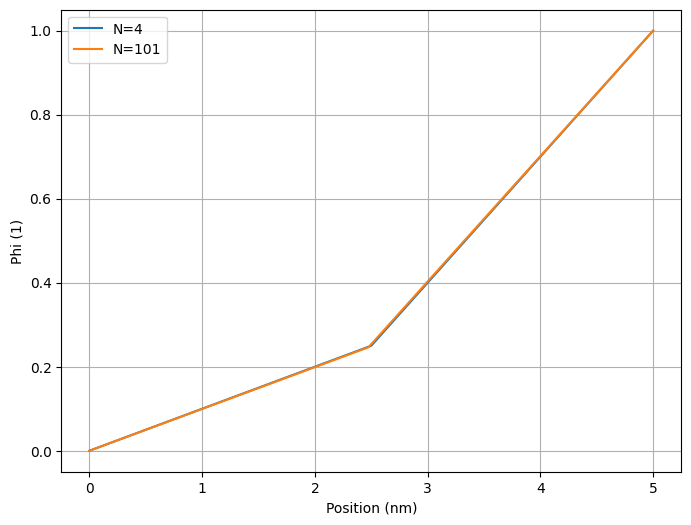

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a, e1, e2 = 5, 11.7, 3.9

def set_matrix(N, dx):
    """행렬 A와 벡터 b를 설정하는 함수"""
    A = np.zeros((N+1, N+1))
    b = np.zeros((N+1, 1))

    A[0, 0] = 1
    b[0] = 0

    middle_index = int((a/2) / dx)  # 항상 같은 위치에서 전환하도록

    for ii in range(1, N):
        if ii == middle_index:
            A[ii, ii-1], A[ii, ii], A[ii, ii+1] = e1, -e1 - e2, e2
        elif ii < middle_index:
            A[ii, ii-1], A[ii, ii], A[ii, ii+1] = e1, -2 * e1, e1
        else:
            A[ii, ii-1], A[ii, ii], A[ii, ii+1] = e2, -2 * e2, e2

    A[N, N] = 1
    b[N] = 1

    return A, b

def solve_potential(N):
    dx = a / N
    x = np.linspace(0, a, N+1)
    A, b = set_matrix(N, dx)
    phi = np.linalg.solve(A, b)
    return x, phi

N_values = [4,101]
plt.figure(figsize=(8, 6))

for N in N_values:
    x, phi = solve_potential(N)
    plt.plot(x, phi, label=f"N={N}")

plt.xlabel('Position (nm)')
plt.ylabel('Phi (1)')
plt.grid()
plt.legend()
plt.show()


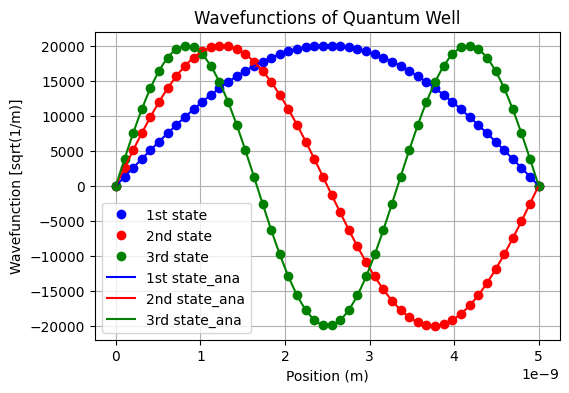

En_num1: 0.079 eV, En_num2: 0.316 eV, En_num3: 0.710 eV
En_ana1: 0.079 eV, En_ana2: 0.317 eV, En_ana3: 0.712 eV


In [2]:
from constant import q, m0, kB, k, epsilon_si, epsilon_ox, epsilon0, nint, T, kT, h, hbar, m
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def build_Hamiltonian(N, dx):
    """Discretized Hamiltonian matrix using finite difference method"""
    N1 = N - 2  # 내부 노드 수
    A = np.zeros((N1, N1))
    for i in range(N1):
        if i == 0:
            A[i, i] = -2
            A[i, i + 1] = 1
        elif i == N1 - 1:
            A[i, i - 1] = 1
            A[i, i] = -2
        else:
            A[i, i - 1] = 1
            A[i, i] = -2
            A[i, i + 1] = 1
    H = -hbar**2 / (2 * m * q) * A / dx**2
    return H

a = 5e-9
N = 50
dx = a / (N - 1)
x = np.linspace(0, a, N)

# Hamiltonian 만들기
H = build_Hamiltonian(N, dx)

# Eigenvalue, Eigenvector 계산
E, psi = eigh(H)

# 전체 wavefunction 배열 만들기
wavefunctions = np.zeros((N, psi.shape[1]))
wavefunctions[1:-1, :] = psi

# 정규화
for n in range(wavefunctions.shape[1]):
    norm = np.sqrt(np.sum(wavefunctions[:, n]**2) * dx)
    wavefunctions[:, n] /= norm

# 수치 해석 결과 그리기
plt.figure(figsize=(6, 4))
plt.plot(x, wavefunctions[:, 0], 'bo', label='1st state')
plt.plot(x, wavefunctions[:, 1], 'ro', label='2nd state')
plt.plot(x, -wavefunctions[:, 2], 'go', label='3rd state')

# 해석 해 결과 그리기
x_ana = np.linspace(0, a, 100)
psi_ana1 = np.sqrt(2 / a) * np.sin(1 * np.pi * x_ana / a)
psi_ana2 = np.sqrt(2 / a) * np.sin(2 * np.pi * x_ana / a)
psi_ana3 = np.sqrt(2 / a) * np.sin(3 * np.pi * x_ana / a)

plt.plot(x_ana, psi_ana1, 'b', label='1st state_ana')
plt.plot(x_ana, psi_ana2, 'r', label='2nd state_ana')
plt.plot(x_ana, psi_ana3, 'g', label='3rd state_ana')

plt.xlabel('Position (m)')
plt.ylabel('Wavefunction [sqrt(1/m)]')
plt.title('Wavefunctions of Quantum Well')
plt.legend()
plt.grid()
plt.show()

# 에너지 출력
print(f"En_num1: {E[0]:.3f} eV, En_num2: {E[1]:.3f} eV, En_num3: {E[2]:.3f} eV")

En_ana1 = hbar**2 / (2 * m * q) * (1 * np.pi / a)**2
En_ana2 = hbar**2 / (2 * m * q) * (2 * np.pi / a)**2
En_ana3 = hbar**2 / (2 * m * q) * (3 * np.pi / a)**2
print(f"En_ana1: {En_ana1:.3f} eV, En_ana2: {En_ana2:.3f} eV, En_ana3: {En_ana3:.3f} eV")
